In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [3]:
sys.path.append(os.path.abspath(".."))
from utils import read_features, read_targets, metrics_r, update_scoreboard, plot_compare_feature_scores, \
    load_best_params, scale_all, reduce_all, add_all_feature_combos, print_info_features, run_cv_all

## Read Features and Targets

In [4]:
path = os.path.abspath(os.path.join(os.getcwd(), "../../data/chronology_prediction"))

In [5]:
X = read_features(path)
y = read_targets(path, ["StartYear", "YearRange"])

Loaded X_train_tfidf
Loaded X_train_bert
Loaded X_train_cannyhog
Loaded X_train_resnet
Loaded X_train_vit
Loaded X_test_tfidf
Loaded X_test_bert
Loaded X_test_cannyhog
Loaded X_test_resnet
Loaded X_test_vit
Loaded y_train
Loaded y_test


## Extra Preprocessing


### Scale Features

In [6]:
X_scaled = scale_all(X)

### Reduce Features

Use n_components=0.95 to keep enough components to preserve 95% of the variance in the data.

In [7]:
X_reduced = reduce_all(X_scaled, n_components=0.95)

### Combine & Re-scale Text & Image Feature Sets

In [8]:
X = add_all_feature_combos(X, scale=False)
X_reduced = add_all_feature_combos(X_reduced, scale=True)

In [9]:
print_info_features(X)

{
	train: {
		tfidf: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 300), 
		bert: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 768), 
		cannyhog: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 2917), 
		resnet: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 2048), 
		vit: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 768), 
		tfidf + cannyhog: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 3217), 
		tfidf + resnet: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 2348), 
		tfidf + vit: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 1068), 
		bert + cannyhog: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 3685), 
		bert + resnet: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 2816), 
		bert + vit: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 1536), 
	},
	test: {
		tfidf: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (191, 300), 
		bert

## Load Best Parameters from HP Tuning

In [10]:
path_params = "best_params.json"
best_params = load_best_params(path_params)

## Initialize 10-Fold Cross Validation


In [11]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
folds = list(kf.split(np.arange(y["train"].shape[0])))

## Initialize Scoreboard

In [12]:
scoreboard = pd.DataFrame(columns=["model", "target", "features"] + list(metrics_r.keys()))
scoreboard

,model,target,features,mae,rmse,r2,medae,maxerror:


## Linear Regression

Compare Mean Cross Validation Scores of Feature Sets for One Model


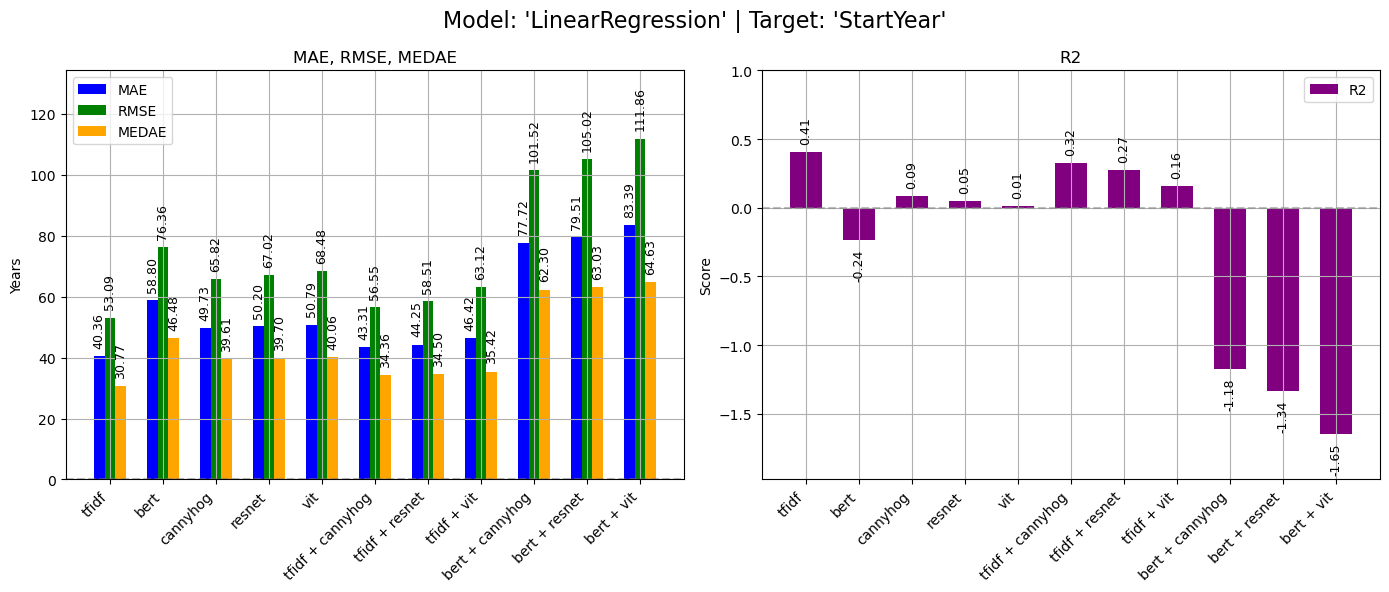

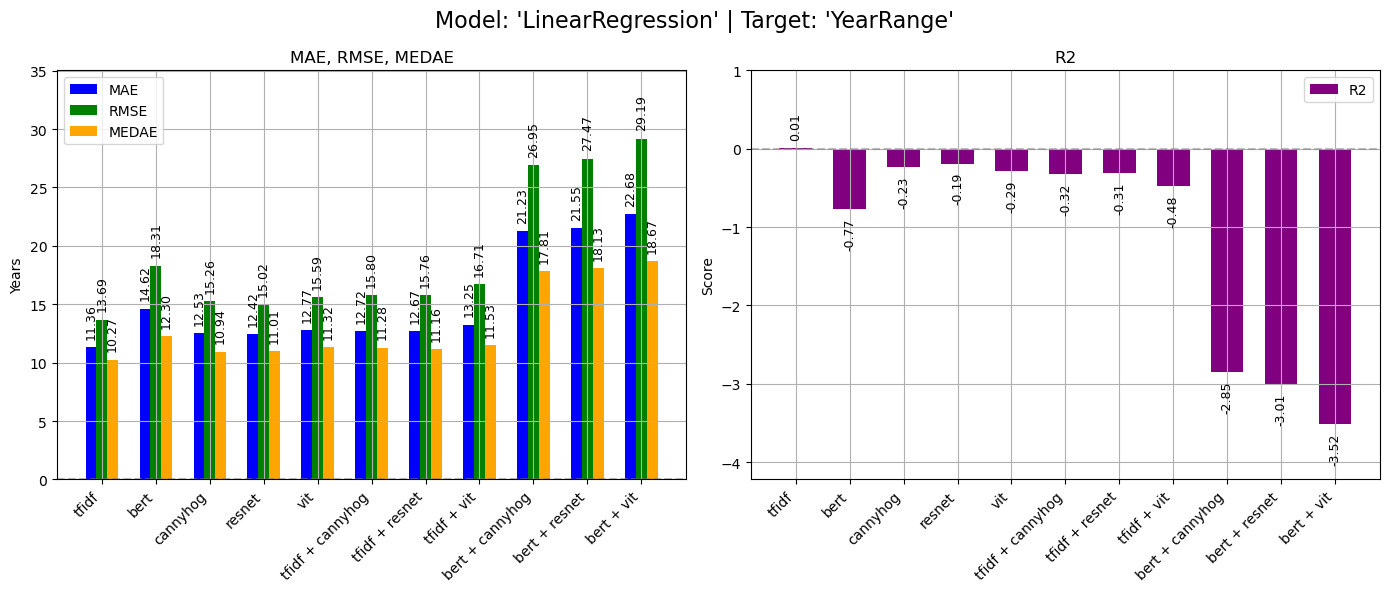

In [13]:
model_name = 'LinearRegression'
model_class = LinearRegression

model_scoreboard = run_cv_all(
    model_name,
    model_class,
    None,
    folds,
    metrics_r,
    X["train"],
    y["train"],
    enable_plots=False,
)
plot_compare_feature_scores(model_scoreboard)
scoreboard = update_scoreboard(scoreboard, model_scoreboard)

## Ridge Regression

Compare Mean Cross Validation Scores of Feature Sets for One Model


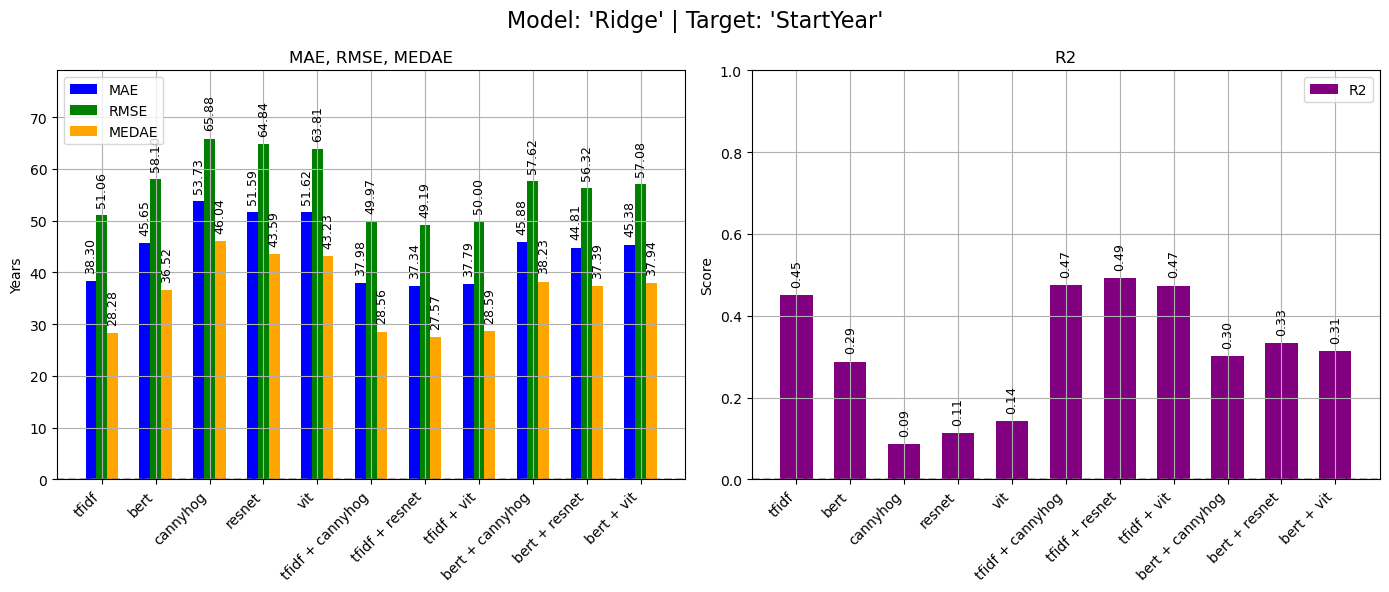

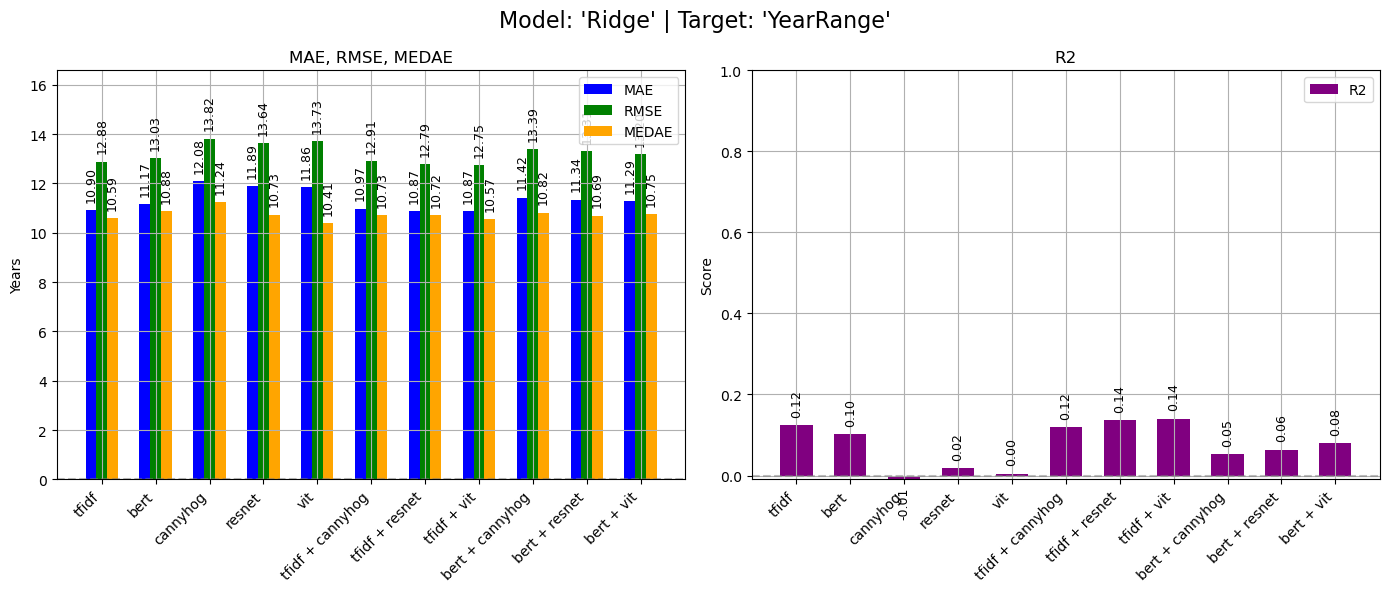

In [14]:
model_name = 'Ridge'
model_class = Ridge

model_scoreboard = run_cv_all(
    model_name,
    model_class,
    best_params[model_name],
    folds,
    metrics_r,
    X_reduced["train"],
    y["train"],
    enable_plots=False,
)
plot_compare_feature_scores(model_scoreboard)
scoreboard = update_scoreboard(scoreboard, model_scoreboard)

## Lasso Regression

Compare Mean Cross Validation Scores of Feature Sets for One Model


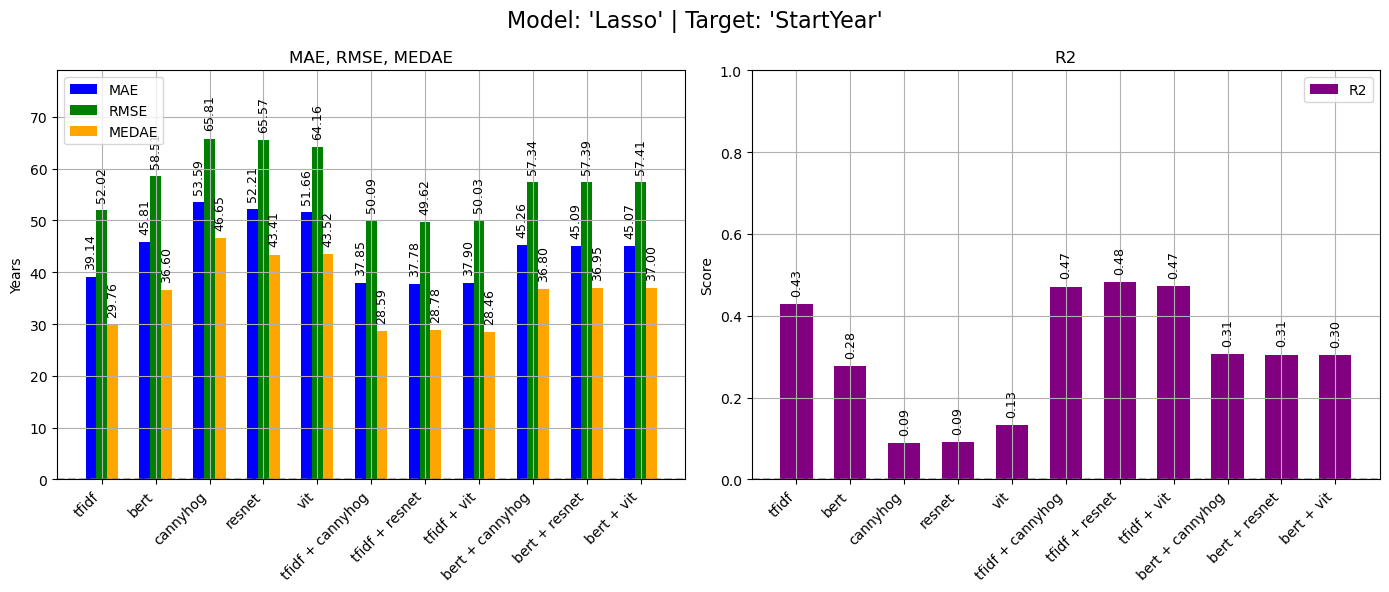

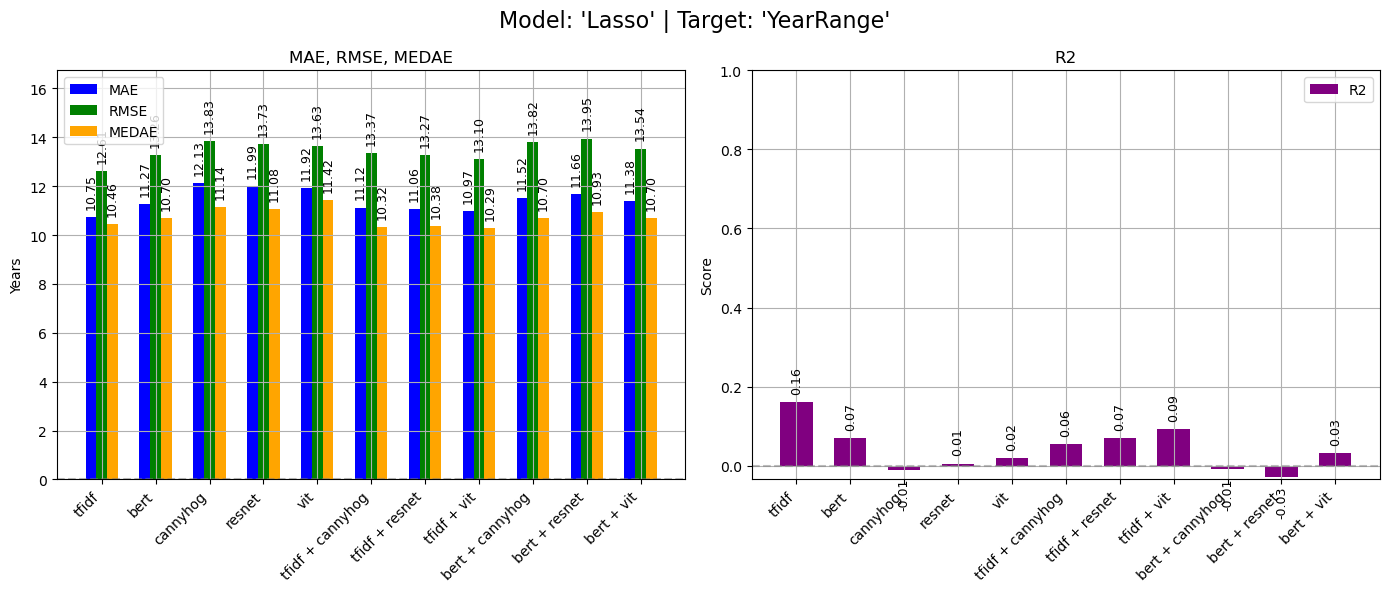

In [15]:
model_name = "Lasso"
model_class = Lasso

model_scoreboard = run_cv_all(
    model_name,
    model_class,
    best_params[model_name],
    folds,
    metrics_r,
    X_reduced["train"],
    y["train"],
    enable_plots=False,
)
plot_compare_feature_scores(model_scoreboard)
scoreboard = update_scoreboard(scoreboard, model_scoreboard)

## Random Forest

Cross Validation Score Progression


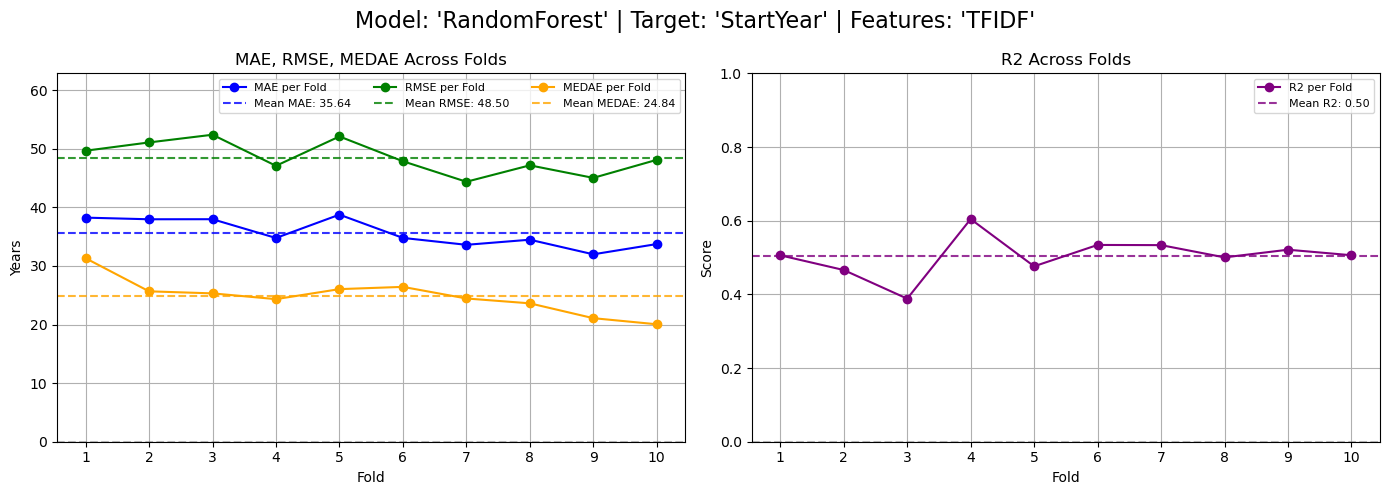

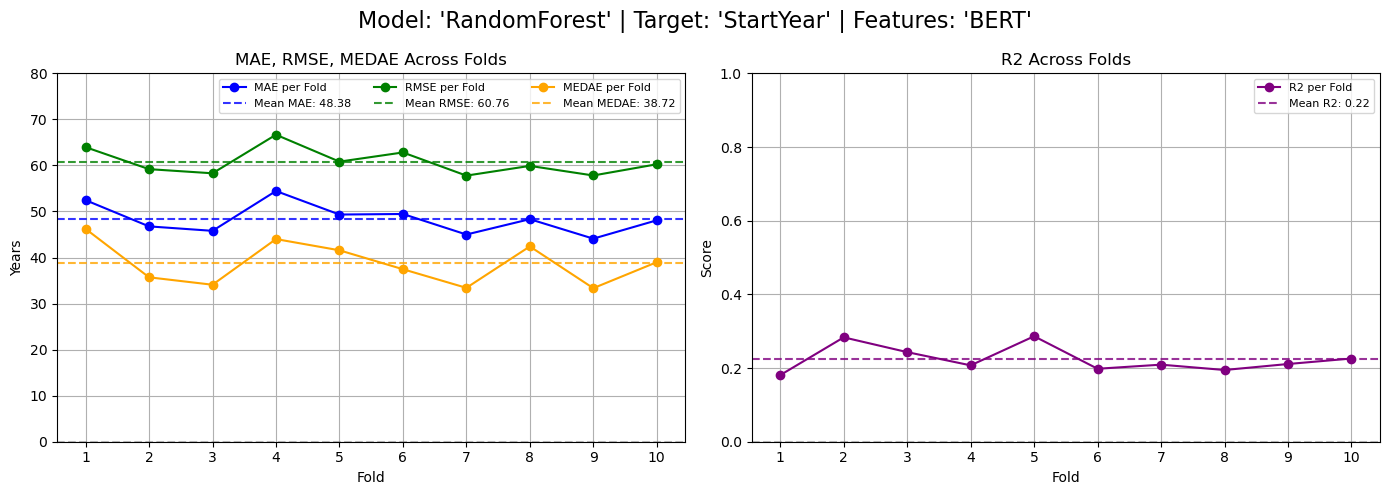

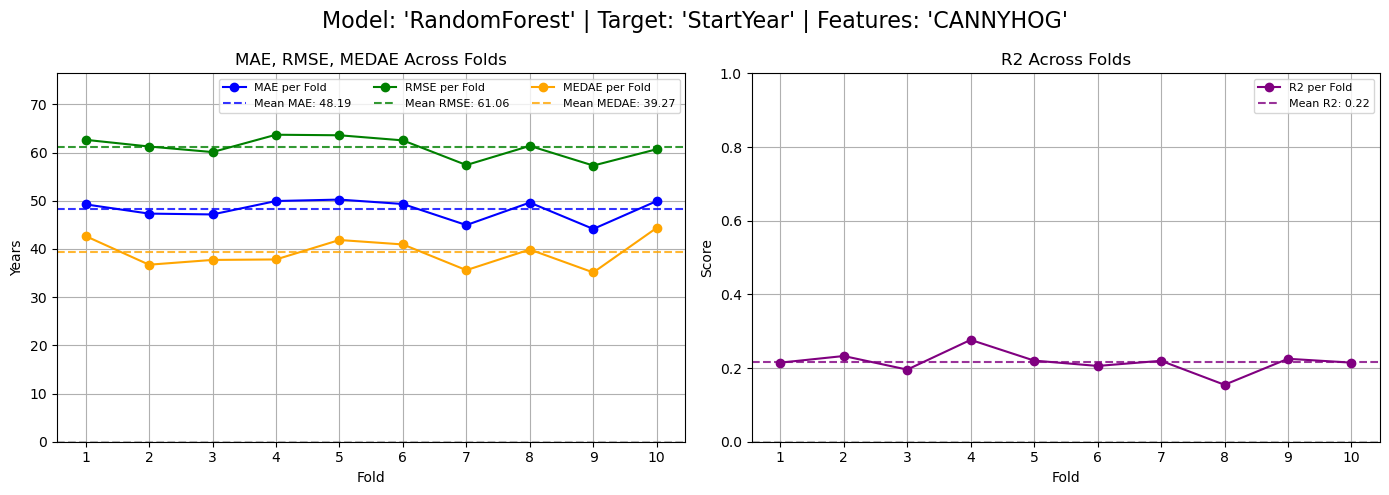

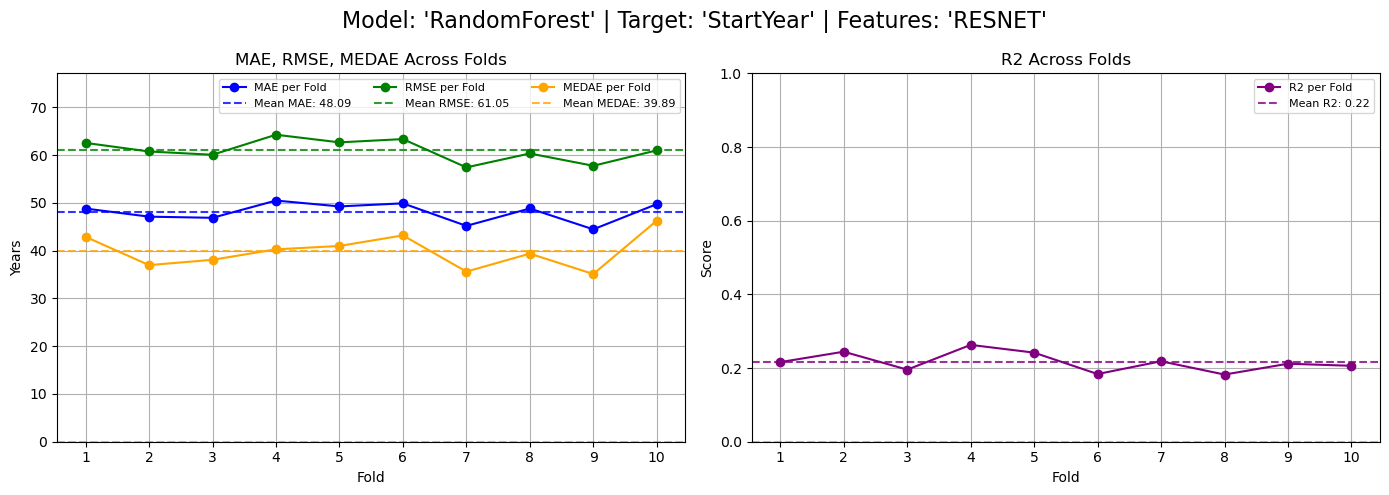

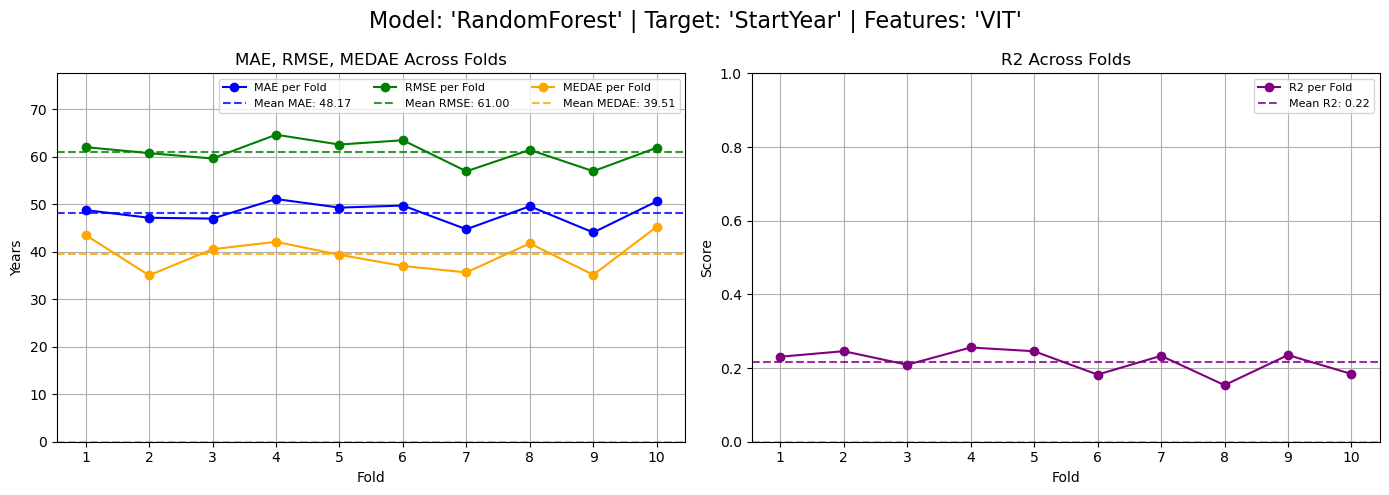

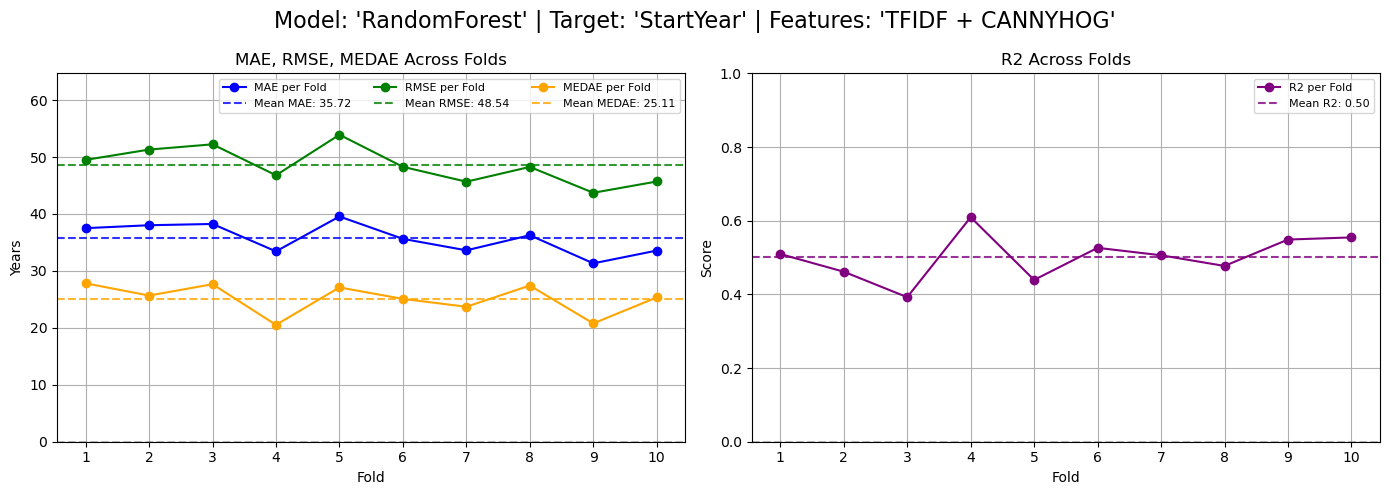

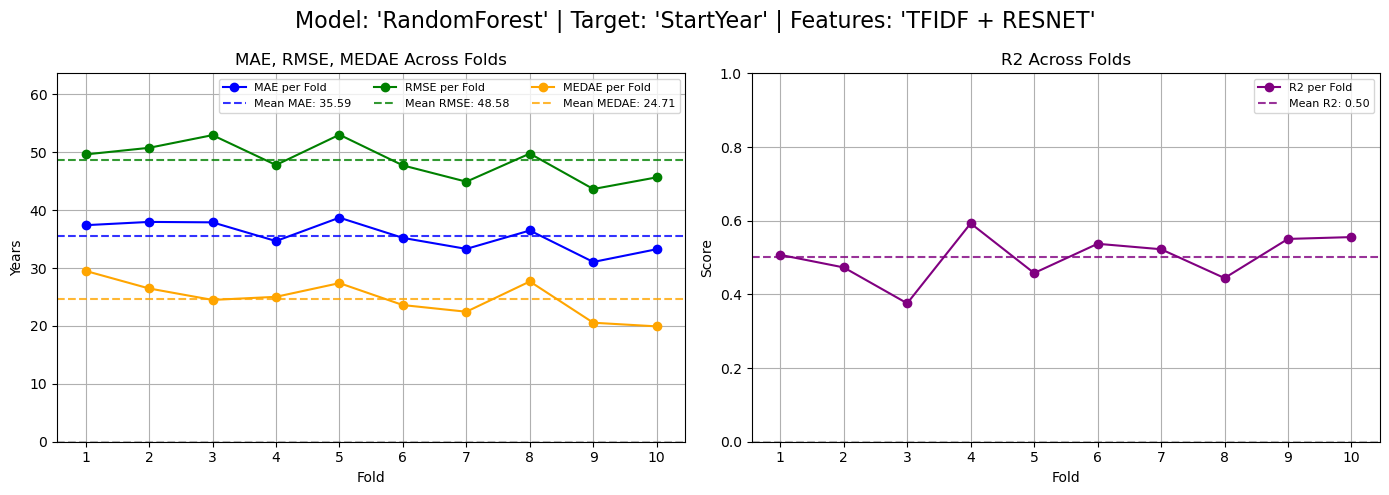

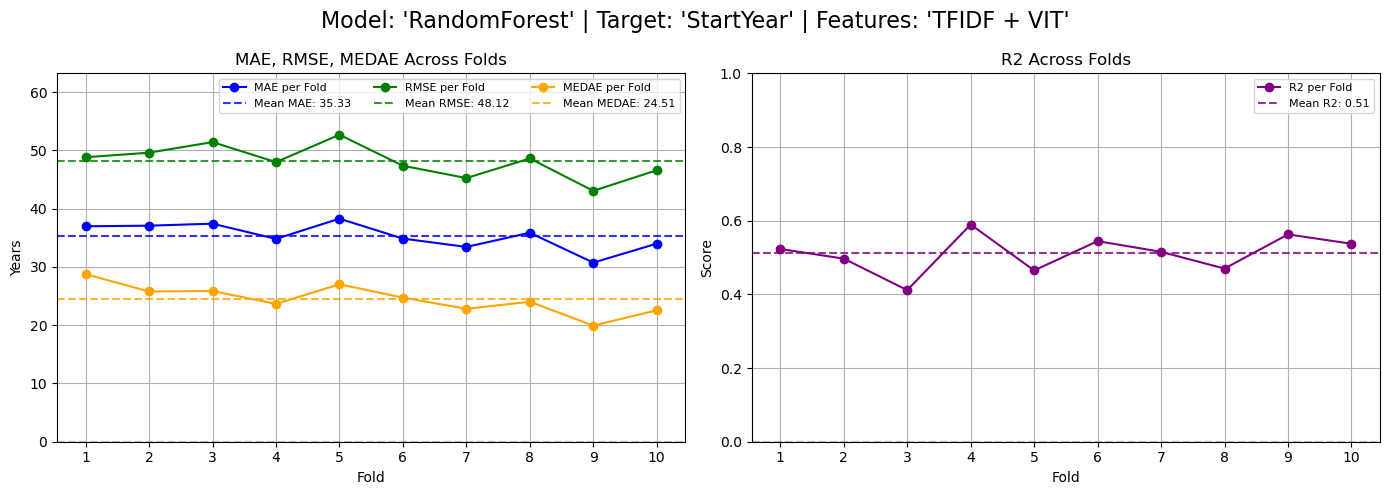

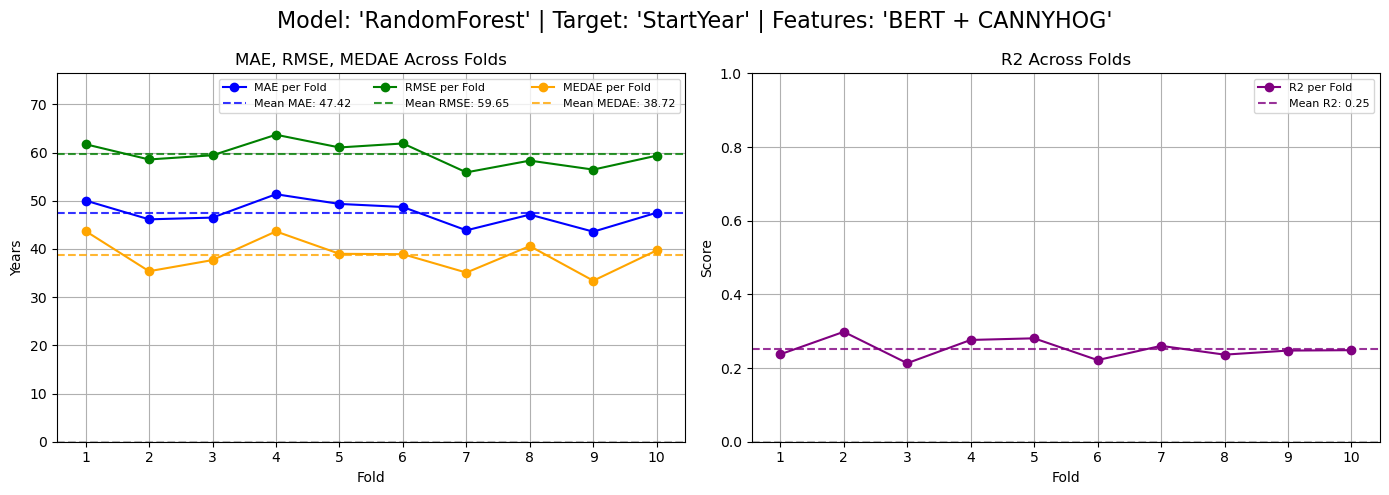

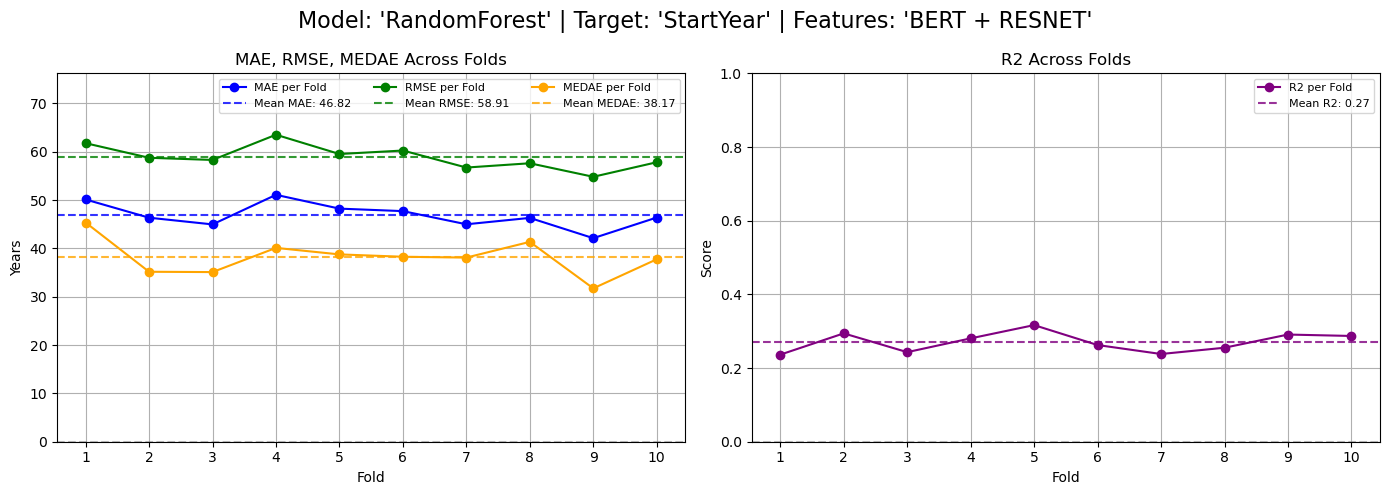

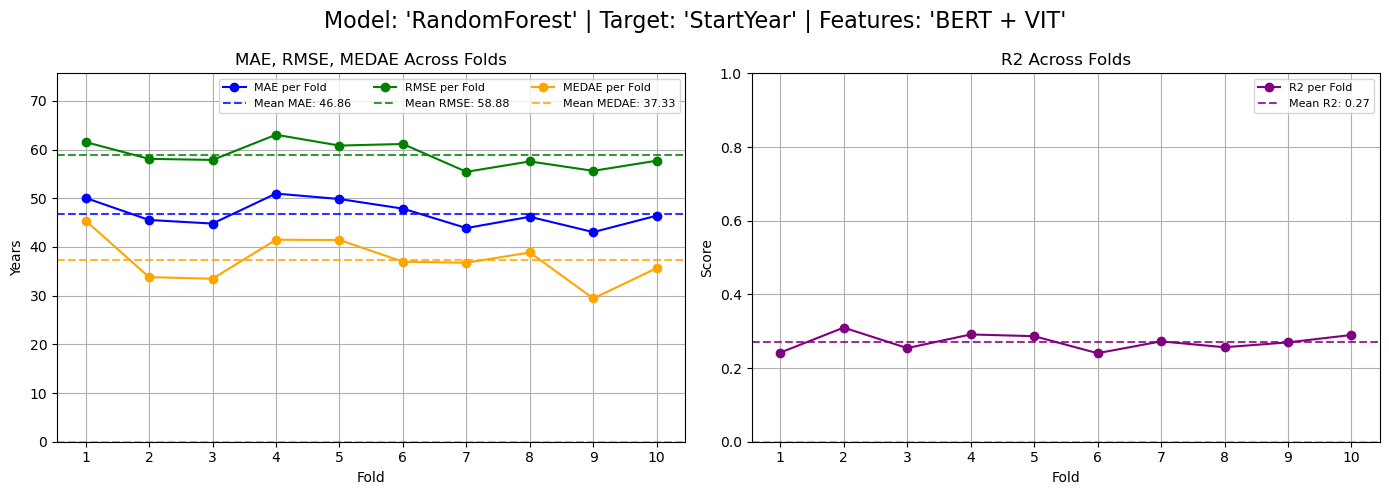

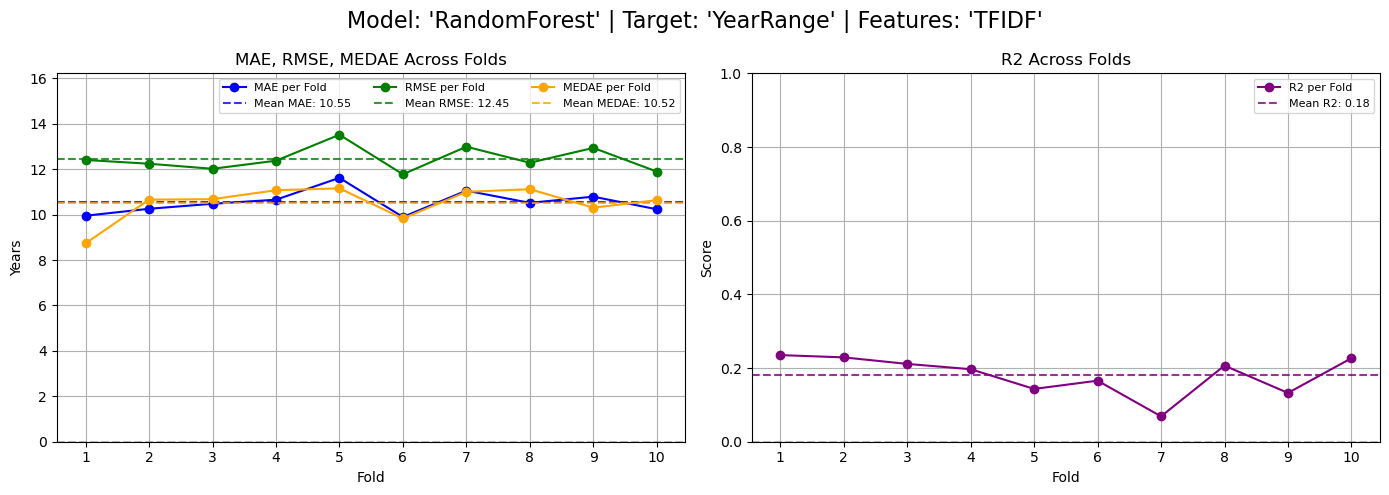

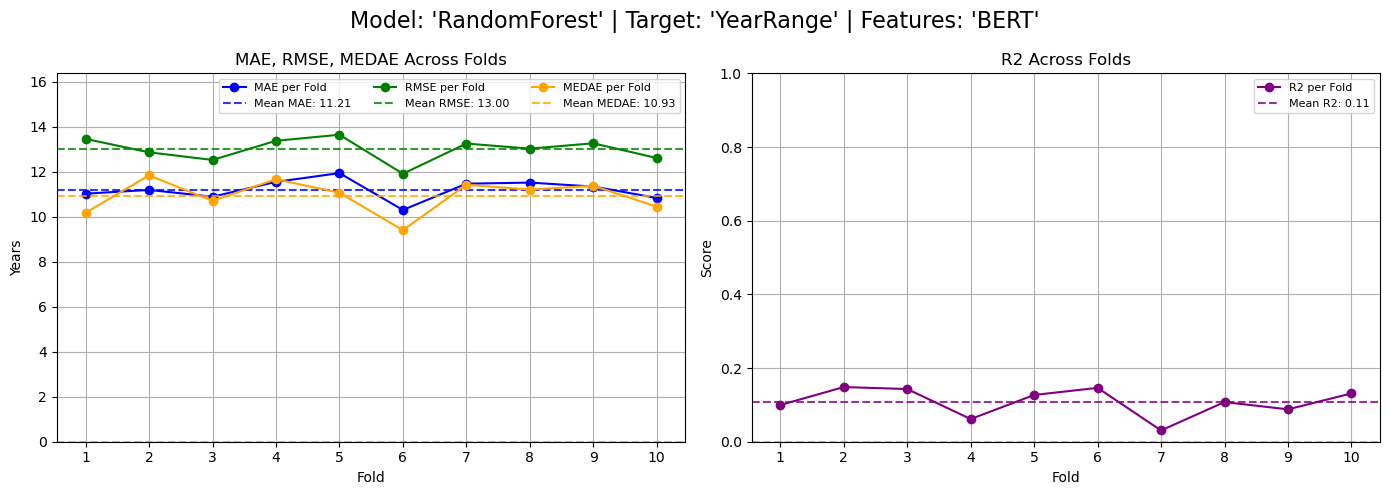

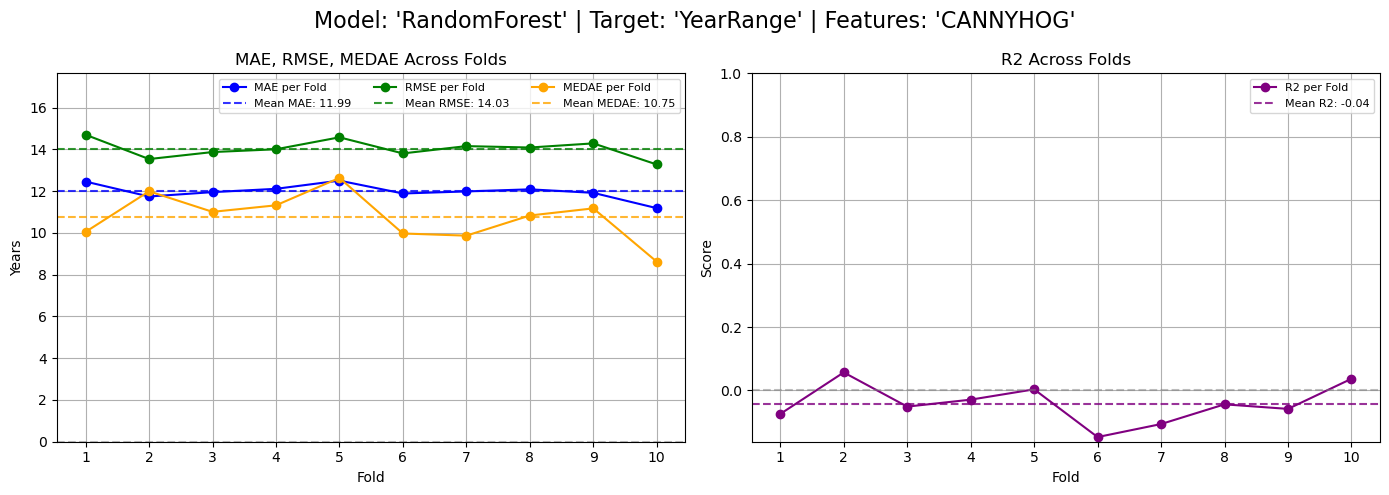

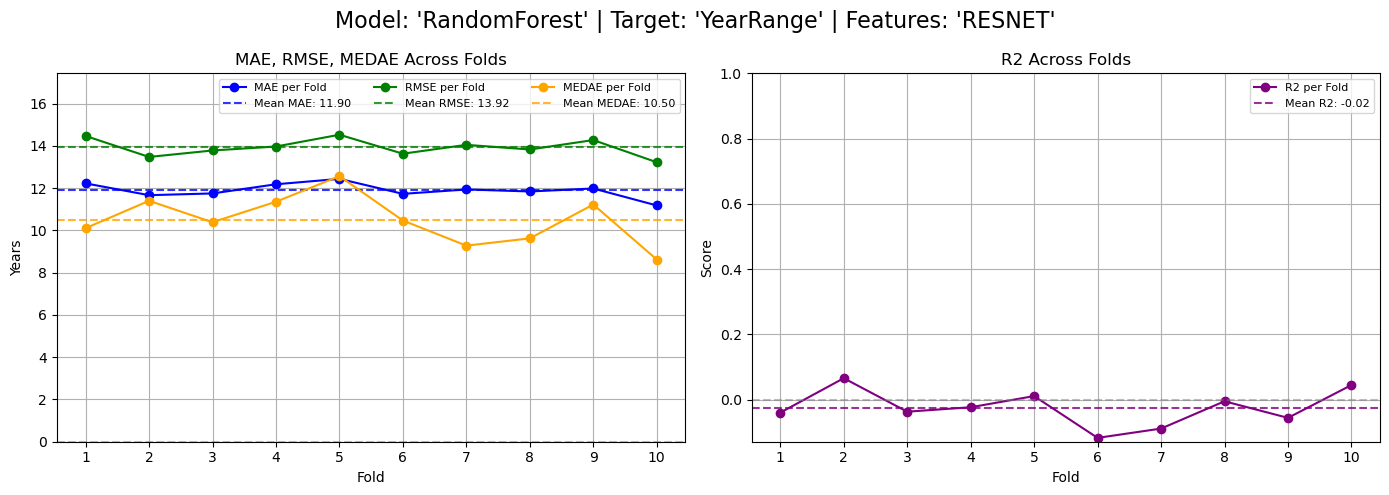

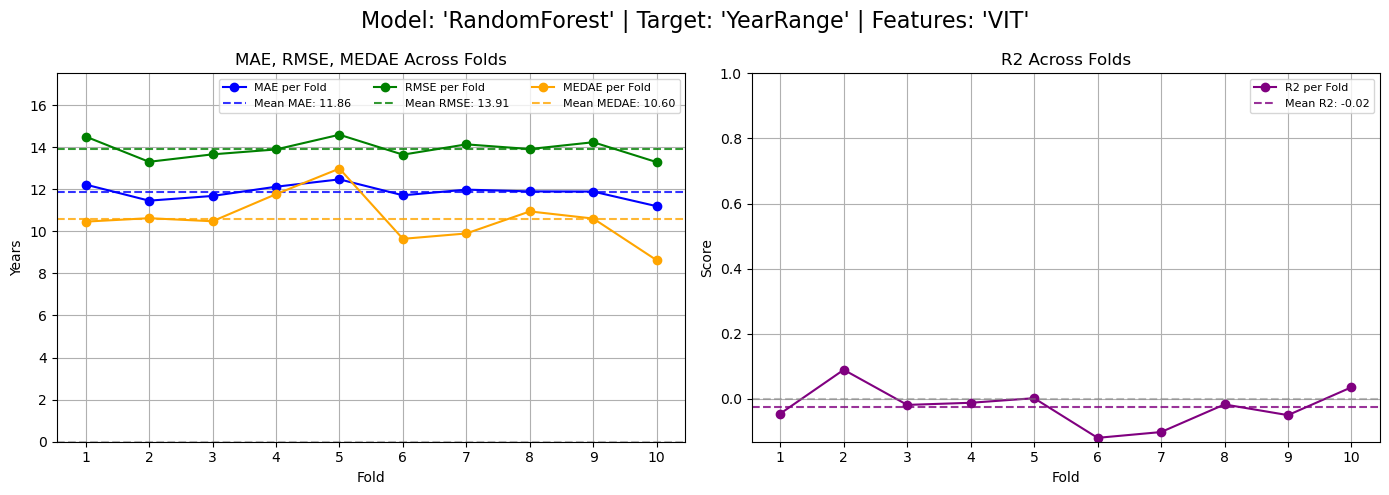

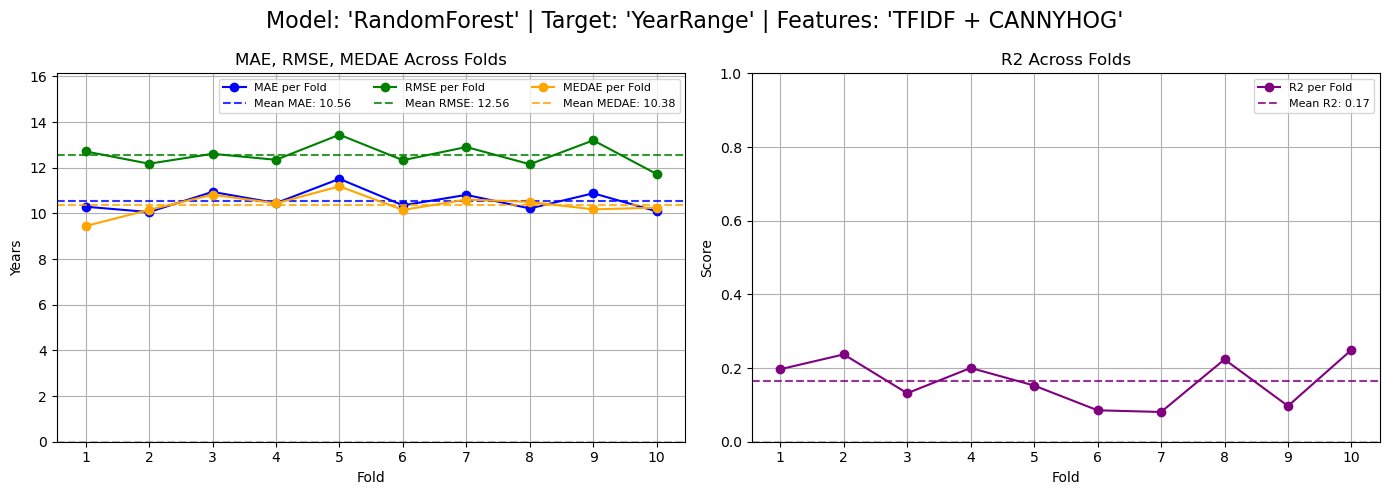

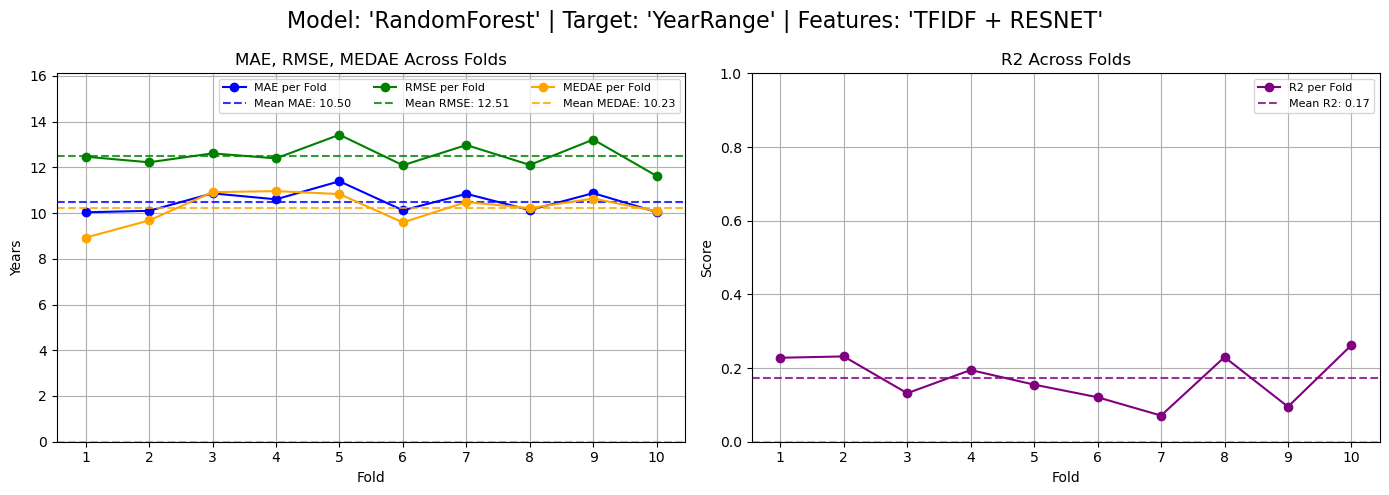

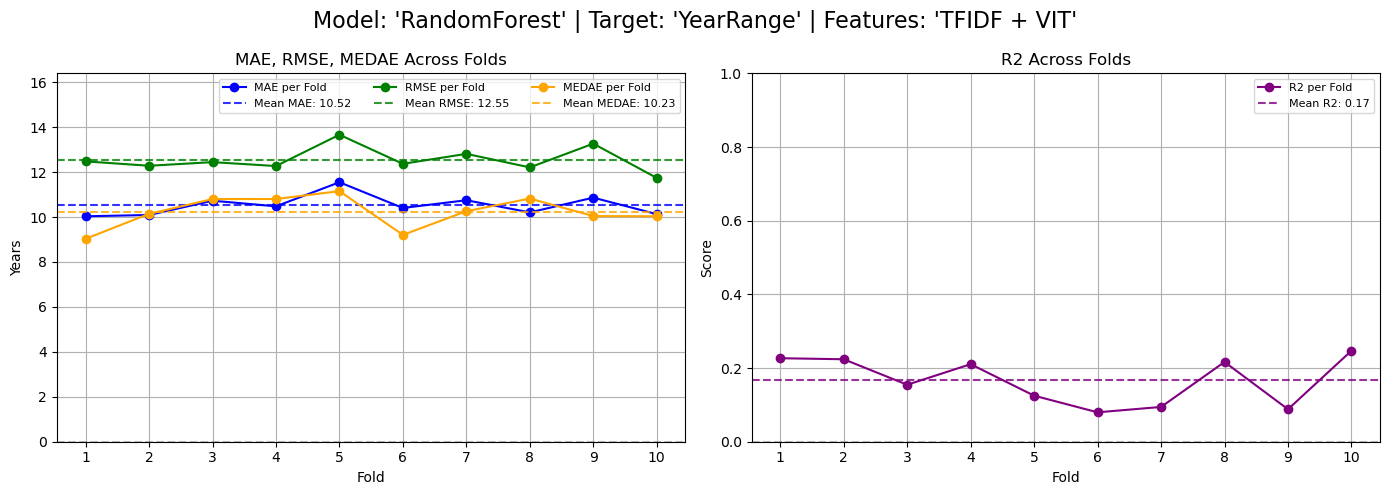

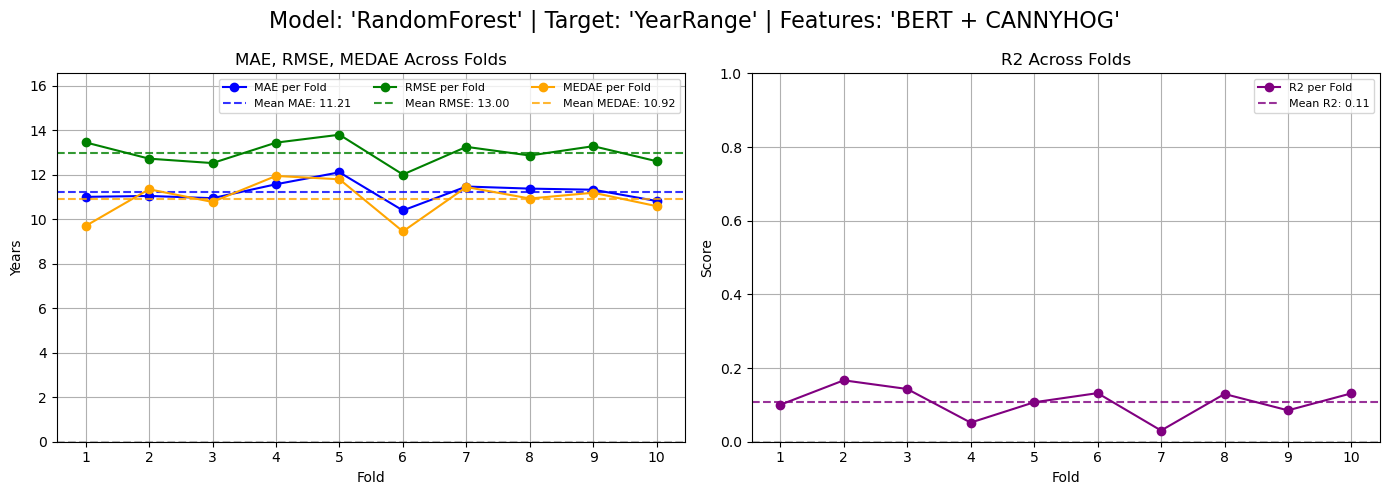

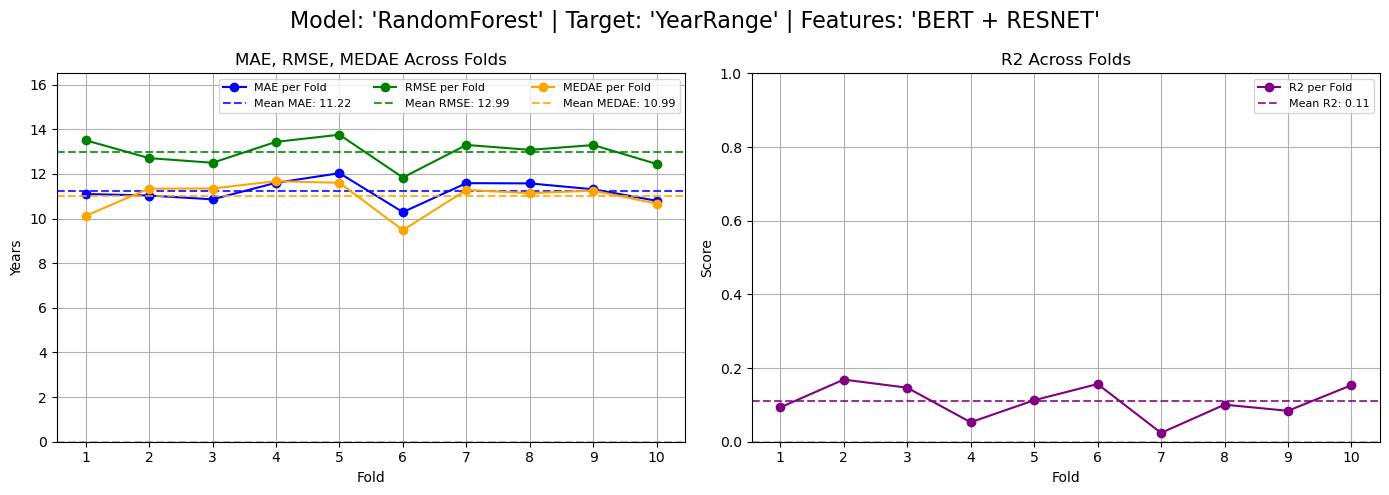

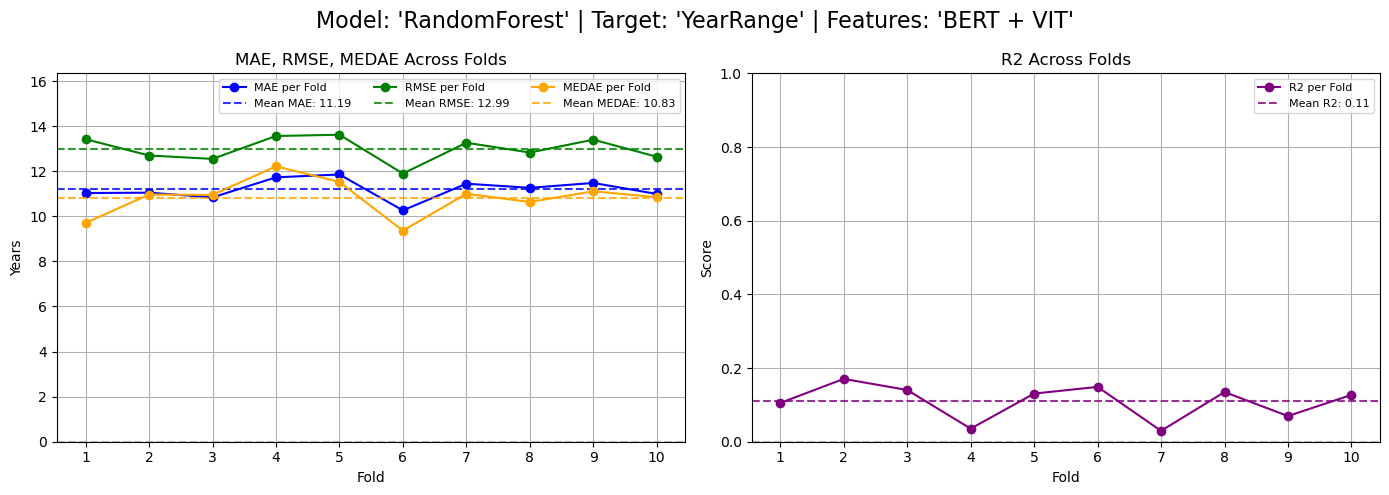

Compare Mean Cross Validation Scores of Feature Sets for One Model


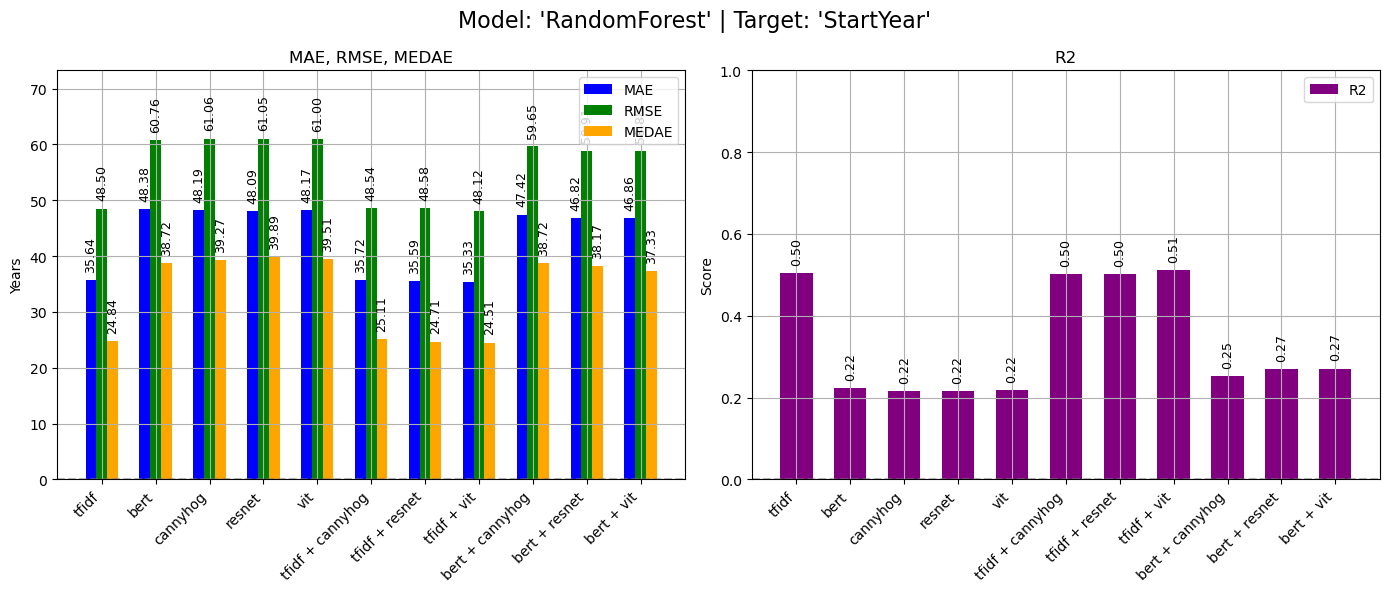

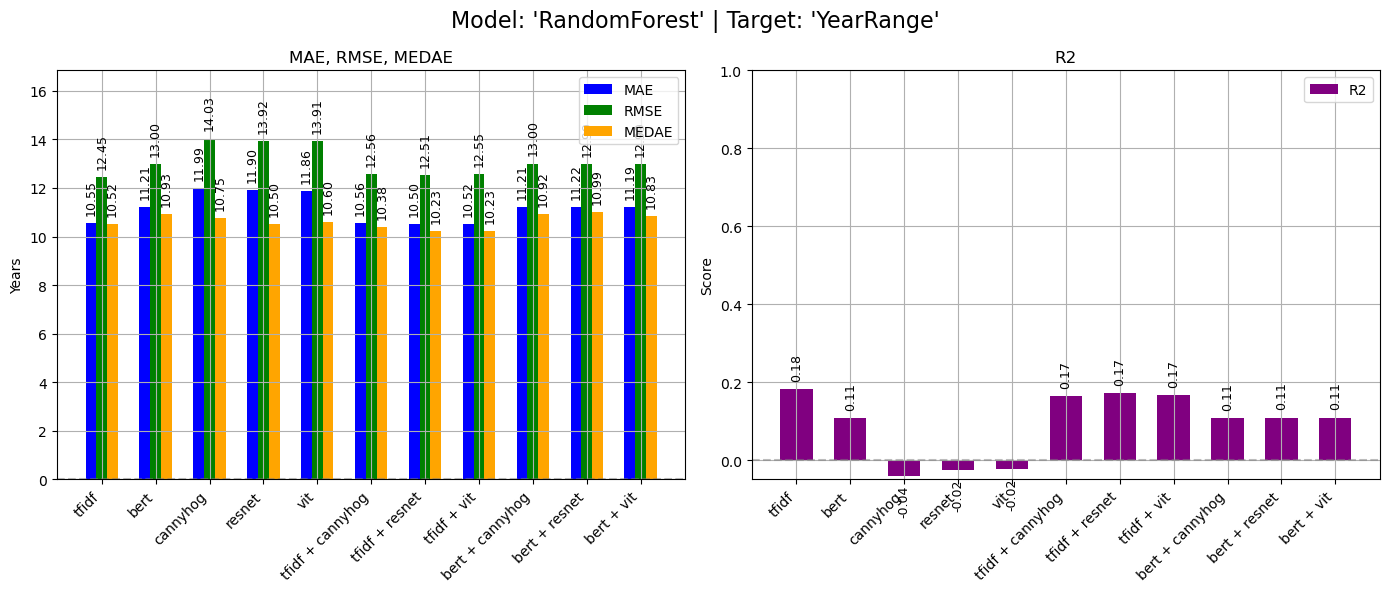

In [16]:
model_name = "RandomForest"
model_class = RandomForestRegressor

model_scoreboard = run_cv_all(
    model_name,
    model_class,
    best_params[model_name],
    folds,
    metrics_r,
    X["train"],
    y["train"],
    enable_plots=True,
)
plot_compare_feature_scores(model_scoreboard)
scoreboard = update_scoreboard(scoreboard, model_scoreboard)

## XGBoost

Compare Mean Cross Validation Scores of Feature Sets for One Model


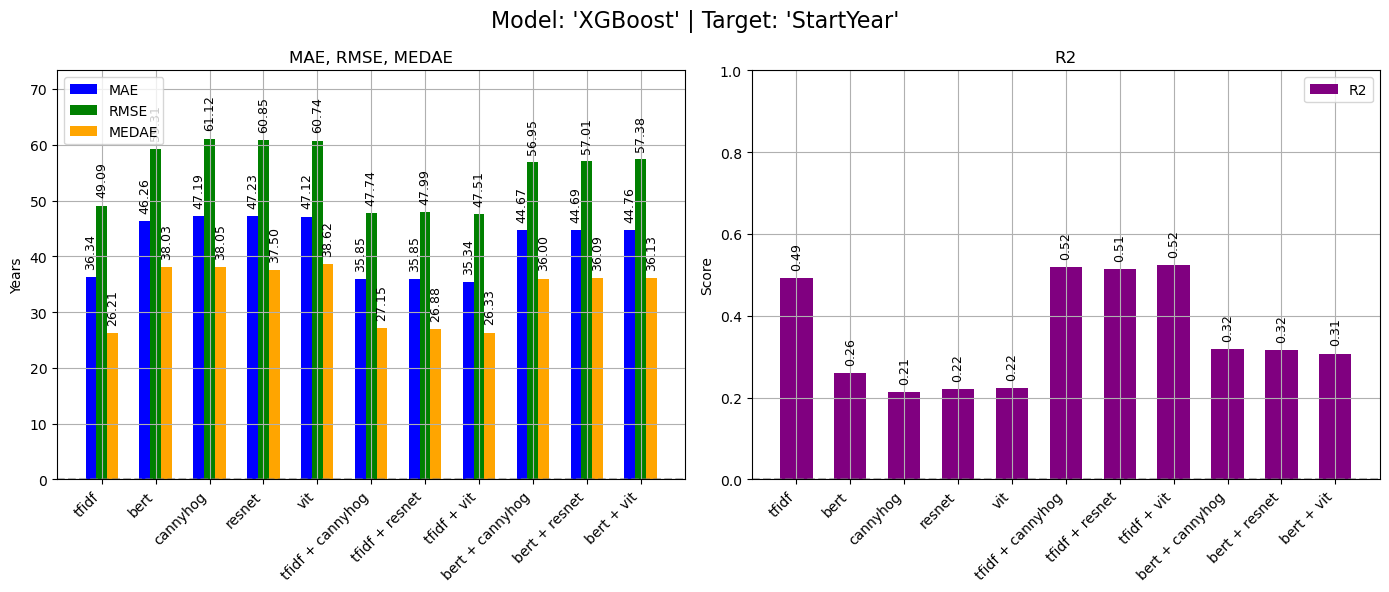

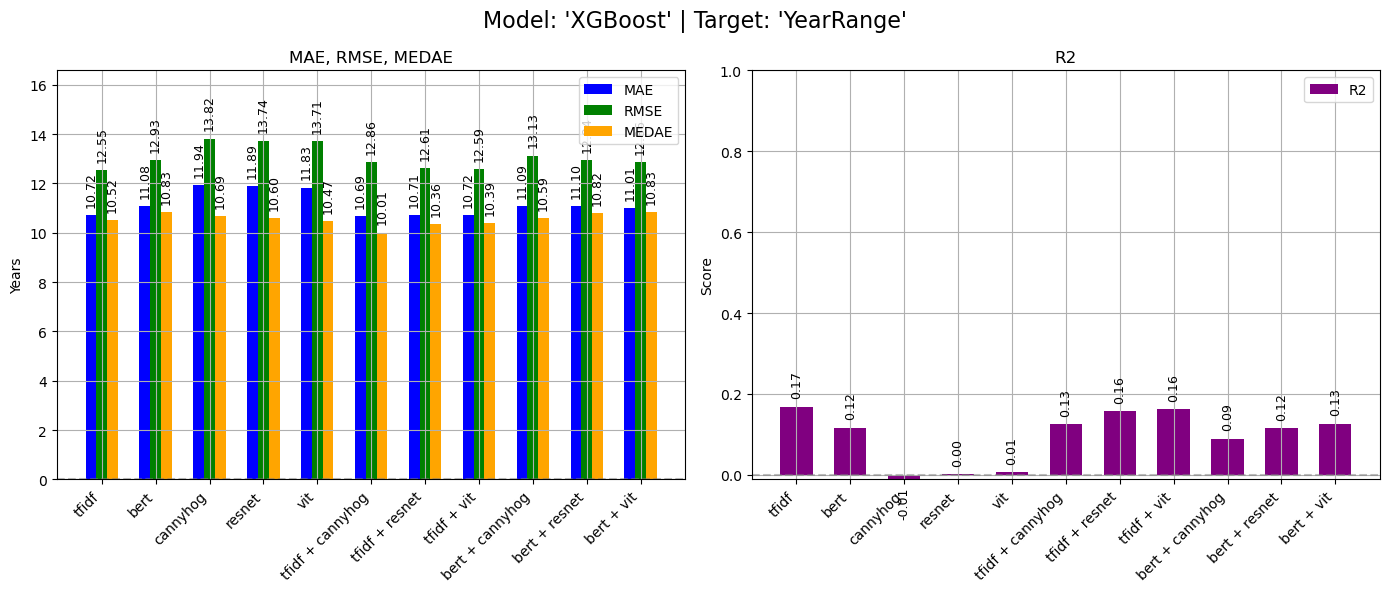

In [17]:
model_name = "XGBoost"
model_class = XGBRegressor

model_scoreboard = run_cv_all(
    model_name,
    model_class,
    best_params[model_name],
    folds,
    metrics_r,
    X["train"],
    y["train"],
    enable_plots=False,
)
plot_compare_feature_scores(model_scoreboard)
scoreboard = update_scoreboard(scoreboard, model_scoreboard)

## LightGBM

Compare Mean Cross Validation Scores of Feature Sets for One Model


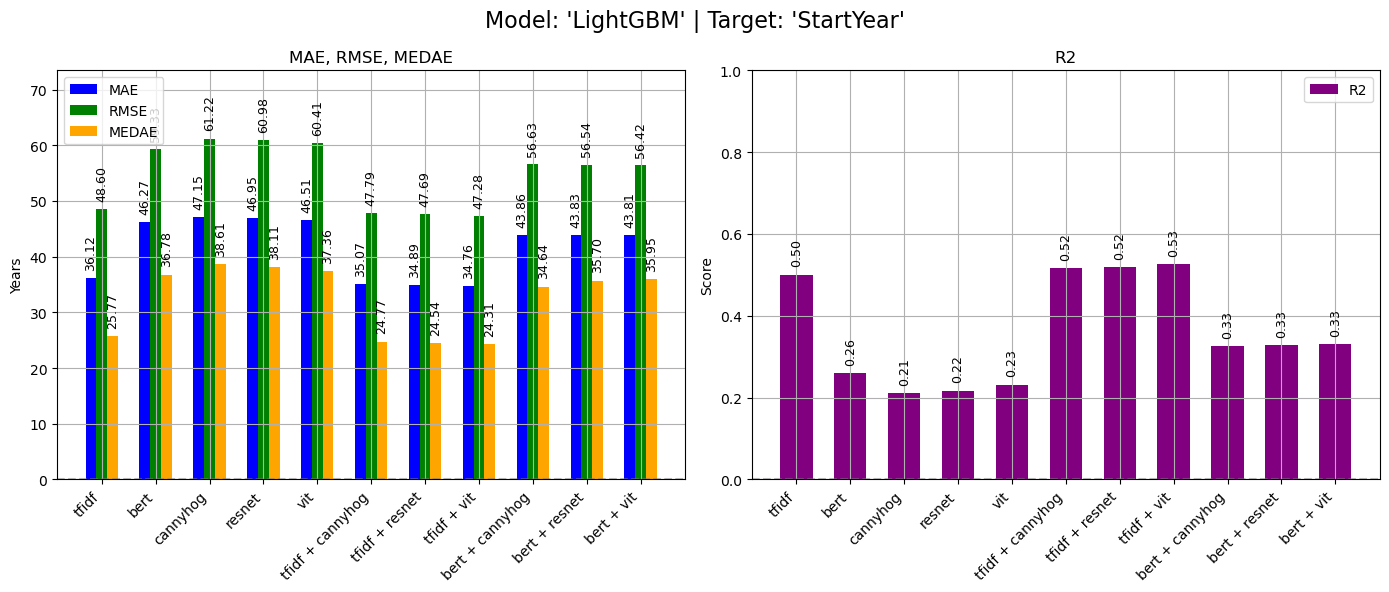

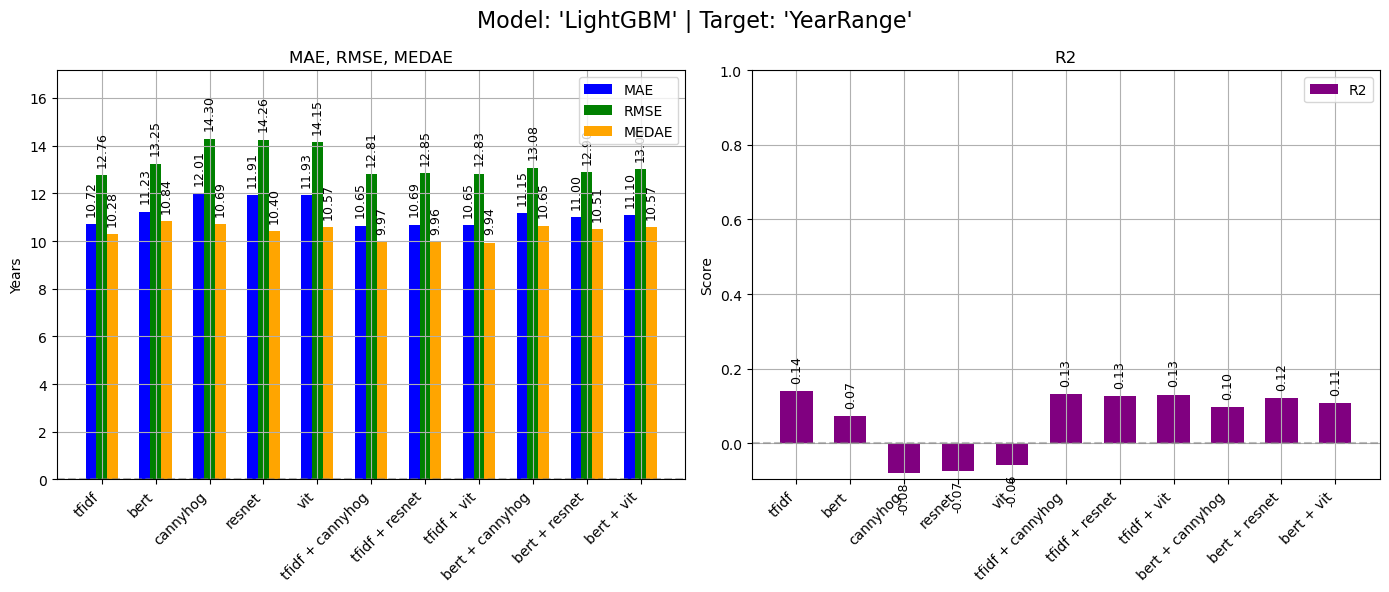

In [18]:
model_name = 'LightGBM'
model_class = LGBMRegressor

model_scoreboard = run_cv_all(
    model_name,
    model_class,
    best_params[model_name],
    folds,
    metrics_r,
    X["train"],
    y["train"],
    enable_plots=False,
)
plot_compare_feature_scores(model_scoreboard)
scoreboard = update_scoreboard(scoreboard, model_scoreboard)

## Final Scoreboard

In [19]:
scoreboard.sample(n=10, random_state=42)

,model,target,features,mae,rmse,r2,medae,maxerror:
56,Lasso,YearRange,bert,11.270183,13.263865,0.070389,10.702496,36.597042
83,RandomForest,YearRange,tfidf + resnet,10.500400,12.513428,0.171938,10.232171,36.431540
19,LinearRegression,YearRange,bert + cannyhog,21.231766,26.945612,-2.848488,17.806431,87.711310
31,Ridge,StartYear,bert + resnet,44.810461,56.320435,0.332571,37.390463,158.063628
76,RandomForest,StartYear,bert + vit,46.861527,58.884593,0.271225,37.325685,157.037414
117,LightGBM,StartYear,tfidf + vit,34.755099,47.284028,0.527190,24.313688,160.269304
55,Lasso,YearRange,tfidf,10.748689,12.610437,0.160056,10.460485,35.796987
128,LightGBM,YearRange,tfidf + vit,10.652175,12.826284,0.130373,9.935686,36.810048
64,Lasso,YearRange,bert + resnet,11.661830,13.951014,-0.029123,10.928151,38.112663
26,Ridge,StartYear,vit,51.615437,63.813525,0.143225,43.225570,169.091397


In [20]:
scoreboard.to_csv(
    "cv_scoreboard.csv",
    index=False,
    encoding='utf-8',
    sep=',',
    header=True
)